# SMI - Similarity of Matrices Index
SMI is a measure of the similarity between the dominant subspaces of two matrices. It comes in two flavours (projections): 
- OP - Orthogonal Projections
- PR - Procrustes Rotations.  

The former (default) compares subspaces using ordinary least squares and can be formulated as the explained variance  when predicting one matrix subspace using the other matrix subspace. PR is a restriction where only rotation and scaling is allowed in the similarity calculations.  
  
Subspaces are by default computed using Principal Component Analysis (PCA). When the number of components extracted from one of the matrices is smaller than the other, the explained variance is calculated predicting the smaller subspace by using the larger subspace.

## Example: Sensory and Fluorescence data
---
### Import packages and prepare data

First import **hoggorm** for analysis of the data and **hoggormPlot** for plotting of the analysis results. We'll also import **pandas** such that we can read the data into a data frame. **numpy** is needed for checking dimensions of the data.

In [18]:
import hoggorm as ho
import hoggormplot as hop
import pandas as pd
import numpy as np

Next, load the data that we are going to analyse using **hoggorm**. After the data has been loaded into the pandas data frame, we'll display it in the notebook.

In [19]:
# Load fluorescence data
X1_df = pd.read_csv('cheese_fluorescence.txt', index_col=0, sep='\t')
X1_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292
Pr 1,19222.109,19937.834,20491.777,20994.000,21427.500,21915.891,22273.834,22750.279,23215.609,23497.221,...,1338.0557,1311.9445,1275.1666,1235.7777,1204.6666,1184.944500,1140.500000,1109.888800,1099.666600,1070.500000
Pr 2,18965.945,19613.334,20157.277,20661.557,21167.334,21554.057,22031.391,22451.889,22915.334,23311.611,...,1244.5555,1217.1666,1183.9445,1156.5000,1130.0555,1084.000000,1066.500000,1039.944500,1018.500000,992.083313
Pr 3,19698.221,20438.279,21124.721,21740.666,22200.445,22709.725,23222.111,23646.225,24047.389,24519.111,...,1409.5000,1366.9445,1319.8888,1289.7778,1258.2223,1235.166600,1200.611000,1173.277800,1126.555700,1097.250000
Pr 4,20037.334,20841.779,21510.889,22096.443,22605.889,23077.834,23547.725,23974.445,24490.889,24896.945,...,1374.5000,1332.3334,1287.5000,1252.9445,1228.8334,1195.944300,1159.166600,1153.611200,1117.222300,1088.333400
Pr 5,19874.889,20561.834,21248.500,21780.889,22328.834,22812.057,23266.111,23723.334,24171.221,24601.943,...,1329.0000,1291.9445,1256.7778,1226.6110,1209.7777,1169.888800,1144.555500,1123.333400,1084.888800,1081.500000
Pr 6,19529.391,20157.834,20847.500,21308.111,21716.443,22165.775,22583.166,22993.779,23520.779,24015.221,...,1737.3888,1696.5000,1635.5000,1580.3334,1556.8334,1501.222200,1463.555500,1419.277800,1365.388800,1343.416600
Pr 7,18795.582,19485.582,20139.584,20644.668,21013.668,21480.668,21873.666,22302.418,22662.500,23097.000,...,1323.3333,1286.9167,1261.0000,1235.0833,1190.0833,1174.666700,1129.166700,1095.416600,1070.416600,1049.500000
Pr 8,20052.943,20839.445,21569.221,22150.221,22662.389,23160.389,23589.943,24117.500,24484.334,24971.666,...,1140.2778,1113.1112,1075.8334,1055.7778,1037.1112,1025.777800,986.277832,969.388855,944.944397,936.083313
Pr 9,19001.391,19709.943,20368.443,20939.111,21383.111,21879.111,22335.221,22758.834,23213.443,23688.891,...,1119.1666,1076.7777,1045.3888,1033.1112,1021.3333,994.222229,962.111084,943.000000,920.166687,899.083313
Pr 10,20602.834,21406.389,22144.611,22775.000,23407.443,23940.609,24486.111,24976.275,25480.779,25966.279,...,1248.2777,1226.7778,1195.0000,1169.5000,1135.9445,1120.888800,1069.555500,1062.833400,1034.722200,1016.750000


In [20]:
# Load sensory data
X2_df = pd.read_csv('cheese_sensory.txt', index_col=0, sep='\t')
X2_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
Product,,,,,,,,,,,,,,,,,
Pr 01,6.19,3.33,3.43,2.14,1.29,3.11,6.70,3.22,2.66,5.10,4.57,3.34,2.93,1.89,1.23,3.15,4.07
Pr 02,6.55,2.50,4.32,2.52,1.24,3.91,6.68,2.57,2.42,4.87,4.75,4.13,3.09,2.29,1.51,3.93,4.07
Pr 03,6.23,3.43,3.42,2.03,1.28,2.93,6.61,3.39,2.56,5.00,4.73,3.44,3.08,1.81,1.37,3.19,4.16
Pr 04,6.14,2.93,3.96,2.13,1.08,3.12,6.51,2.98,2.50,4.66,4.68,3.92,2.93,1.99,1.19,3.13,4.29
Pr 05,6.70,1.97,4.72,2.43,1.13,4.60,7.01,2.07,2.32,5.29,5.19,4.52,3.14,2.47,1.34,4.67,4.03
Pr 06,6.19,5.28,1.59,1.07,1.00,1.13,6.42,5.18,2.82,5.02,4.49,2.05,2.54,1.18,1.18,1.29,4.11
Pr 07,6.17,3.45,3.32,2.04,1.47,2.69,6.39,3.81,2.76,4.58,4.32,3.22,2.72,1.81,1.33,2.52,4.26
Pr 08,6.90,2.58,4.24,2.58,1.70,4.19,7.11,2.06,2.47,4.58,5.09,4.44,3.25,2.62,1.73,4.87,3.98
Pr 09,6.70,2.53,4.53,2.32,1.22,4.16,6.91,2.42,2.41,4.52,4.96,4.49,3.37,2.47,1.64,4.54,4.01


### Orthogonal Projections
The default comparison between two matrices with SMI is using Orthogonal Projections, i.e. ordinary least squares regression is used to relate the dominant subspaces in the two matrices.
  
In contrast to PLSR, SMI is not performing av prediction of sensory properties from fluorescence measurements, but rather treats the two sets of measurements symmetrically, focusing on the major variation in each of them.

More details regarding the use of the SMI are found in the [documentation](https://hoggorm.readthedocs.io/en/latest/matrix_corr_coeff.html).

In [21]:
# Get the values from the data frame
X1 = X1_df.values
X2 = X2_df.values

smiOP = ho.SMI(X1, X2, ncomp1=10, ncomp2=10)
print(np.round(smiOP.smi, 2))

[[0.21 0.31 0.32 0.58 0.59 0.65 0.66 0.67 0.83 0.83]
 [0.65 0.56 0.62 0.76 0.77 0.8  0.8  0.81 0.9  0.9 ]
 [0.72 0.61 0.54 0.65 0.66 0.69 0.74 0.76 0.82 0.85]
 [0.73 0.65 0.61 0.59 0.6  0.63 0.68 0.76 0.81 0.86]
 [0.74 0.66 0.62 0.6  0.51 0.55 0.6  0.71 0.77 0.84]
 [0.86 0.8  0.76 0.71 0.66 0.59 0.63 0.72 0.78 0.84]
 [0.89 0.82 0.78 0.75 0.69 0.64 0.64 0.72 0.78 0.83]
 [0.94 0.88 0.83 0.84 0.84 0.76 0.75 0.74 0.8  0.85]
 [0.97 0.94 0.88 0.9  0.89 0.8  0.79 0.78 0.79 0.84]
 [0.99 0.96 0.89 0.91 0.91 0.83 0.84 0.83 0.83 0.8 ]]


A hypothesis can be made regarding the similarity of two subspaces where the null hypothesis is that they are equal and the alternative is that they are not. Permutation testing yields the following P-values (probabilities that the observed difference could be larger given the null hypothesis is true).

In [22]:
print(np.round(smiOP.significance(), 2))

[[0.   0.   0.   0.19 0.29 0.57 0.58 0.53 0.78 0.59]
 [0.09 0.   0.09 0.71 0.9  0.99 0.99 0.96 0.98 0.92]
 [0.33 0.08 0.   0.29 0.66 0.94 0.98 0.94 0.94 0.84]
 [0.53 0.32 0.18 0.07 0.41 0.87 0.96 0.98 0.95 0.92]
 [0.69 0.59 0.5  0.4  0.02 0.5  0.81 0.94 0.92 0.9 ]
 [0.96 0.99 0.99 0.99 0.97 0.8  0.95 0.98 0.96 0.94]
 [0.98 0.99 0.99 1.   0.99 0.96 0.98 0.98 0.97 0.94]
 [0.99 0.99 0.99 1.   1.   1.   1.   1.   1.   0.99]
 [0.99 1.   0.99 1.   1.   0.99 0.99 0.99 1.   0.99]
 [0.99 0.99 0.94 0.99 1.   0.9  0.96 0.96 0.98 0.9 ]]


Finally we visualize the SMI values and their corresponding P-values.

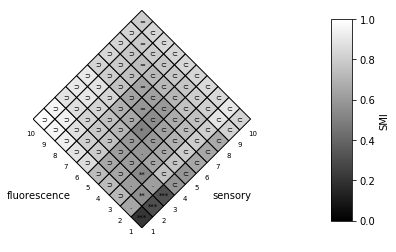

In [23]:
# Plot similarities
hop.plotSMI(smiOP, [10, 10], X1name='fluorescence', X2name='sensory')

The significance symbols in the diamond plot above indicate if a chosen subspace from one matrix can be found inside the subspace from the other matrix ($\supset$, $\subset$, =), or if there is signficant difference (P-values <0.001\*\*\* <0.01 \*\* <0.05 \* <0.1 . >=0.1).  

From the P-values and plot we can observe that the there is a significant difference between the sensory data and the fluorescence data in the first of the dominant subspaces of the matrices. Looking only at the diagonal, we see that 6 components are needed before we loose the significance completely. Looking at the one-dimensional subspaces, we can observe that four sensory components are needed before there is no significant difference to the first fluorescence component.
  
This can be interpreted as some fundamental difference in the information spanned by flurescence measurements and sensory perceptions that is only masked if large proportions of the subspaces are included.

### Procrustes Rotations
The similarities using PR <= OP, and in this simple case OP$^2$ = PR. Otherwise the pattern stays the same.

In [4]:
smiPR = ho.SMI(X1, X2, ncomp1=10, ncomp2=10, projection="Procrustes")
print(np.round(smiPR.smi, 2))

[[0.21 0.31 0.32 0.58 0.59 0.65 0.66 0.67 0.83 0.83]
 [0.65 0.52 0.57 0.75 0.76 0.79 0.79 0.8  0.89 0.9 ]
 [0.72 0.56 0.5  0.62 0.63 0.68 0.72 0.75 0.81 0.85]
 [0.73 0.61 0.58 0.51 0.52 0.56 0.64 0.74 0.79 0.85]
 [0.74 0.62 0.59 0.53 0.41 0.48 0.55 0.66 0.73 0.82]
 [0.86 0.79 0.75 0.69 0.59 0.48 0.55 0.64 0.7  0.82]
 [0.89 0.81 0.78 0.74 0.63 0.54 0.55 0.64 0.7  0.81]
 [0.94 0.88 0.82 0.83 0.83 0.72 0.7  0.67 0.72 0.83]
 [0.97 0.94 0.87 0.9  0.89 0.76 0.75 0.7  0.71 0.81]
 [0.99 0.96 0.88 0.91 0.91 0.79 0.8  0.76 0.77 0.72]]


The number of permutations can be controlled for quick (100) or accurate (>10000) computations of significance.

In [14]:
print(np.round(smiPR.significance(B = 100),2))

[[0.   0.   0.   0.25 0.33 0.65 0.61 0.49 0.74 0.53]
 [0.11 0.   0.05 0.56 0.84 0.96 0.99 0.96 0.99 0.89]
 [0.36 0.01 0.   0.02 0.26 0.84 0.97 0.98 0.95 0.85]
 [0.59 0.22 0.02 0.   0.01 0.21 0.88 0.99 0.96 0.92]
 [0.73 0.41 0.13 0.01 0.   0.   0.51 0.93 0.92 0.9 ]
 [0.95 0.97 0.98 0.82 0.3  0.   0.44 0.93 0.89 0.91]
 [0.98 0.96 1.   0.99 0.87 0.41 0.34 0.98 0.92 0.93]
 [0.96 0.96 1.   1.   1.   1.   1.   0.99 0.97 0.97]
 [0.97 0.99 1.   1.   1.   0.98 0.98 0.94 0.98 0.98]
 [0.99 0.99 0.96 0.99 1.   0.85 0.9  0.82 0.95 0.88]]


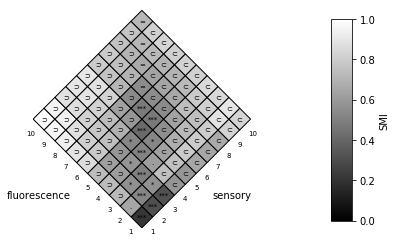

In [17]:
hop.plotSMI(smiPR, X1name='fluorescence', X2name='sensory')

The SMI values in the Procrustes Rotations case are mostly very similar to the Orthogonal Projections case. This means that the differences between the two matrices can be attributed to rotation and scaling to a large degree. With a few execpetions, we therefore see the same patterns in the significances too.

_Reference:_   
Ulf Geir Indahl, Kristian Hovde Liland, Tormod Næs,  
[A similarity index for comparing coupled matrices](https://www.onlinelibrary.wiley.com/doi/10.1002/cem.3049),
Journal of Chemometrics 32(e3049), (2018).